In [1]:
import matplotlib.pyplot as plt
import polars as pl

In [2]:
FONT_SIZE_SMALL = 10
FONT_SIZE_DEFAULT = 14
FONT_SIZE_LARGE = 15

plt.rc("font", family="Georgia")
plt.rc("font", weight="normal")              # controls default font
plt.rc("mathtext", fontset="stix")
plt.rc("font", size=FONT_SIZE_DEFAULT)       # controls default text sizes
plt.rc("axes", titlesize=FONT_SIZE_LARGE)    # fontsize of the axes title
plt.rc("axes", labelsize=FONT_SIZE_DEFAULT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=FONT_SIZE_SMALL)   # fontsize of the tick labels
plt.rc("ytick", labelsize=FONT_SIZE_SMALL)   # fontsize of the tick labels

plt.rc("axes", titlepad=15)                  # add space between title and plot
plt.rc("figure", dpi=300)                    # fix output resolution

In [41]:
data = (
    pl.read_csv("istherecorrelation.csv", separator=";")
    .rename({
        "WO [x1000]": "wo_x1000",
        "NL Beer consumption [x1000 hectoliter]": "beer_consumption_x1000_hl"
    })
    .with_columns(pl.col("wo_x1000").str.replace(",", "."))
    .with_columns(pl.col("wo_x1000").cast(pl.Float64))
    .select(
        pl.col("Year"),
        pl.col("wo_x1000").mul(1000).alias("WO"),
        pl.col("beer_consumption_x1000_hl").mul(1000*100).alias("Litres beer consumed")
    )
    .with_columns(
        (
            (pl.col("WO") - pl.col("WO").min())
            .truediv(pl.col("WO").max() - pl.col("WO").min())
            .alias("WO normalised")
        ),
        (
            (pl.col("Litres beer consumed") - pl.col("Litres beer consumed").min())
            .truediv(pl.col("Litres beer consumed").max() - pl.col("Litres beer consumed").min())
            .alias("Litres beer consumed normalised")
        )
    )
)

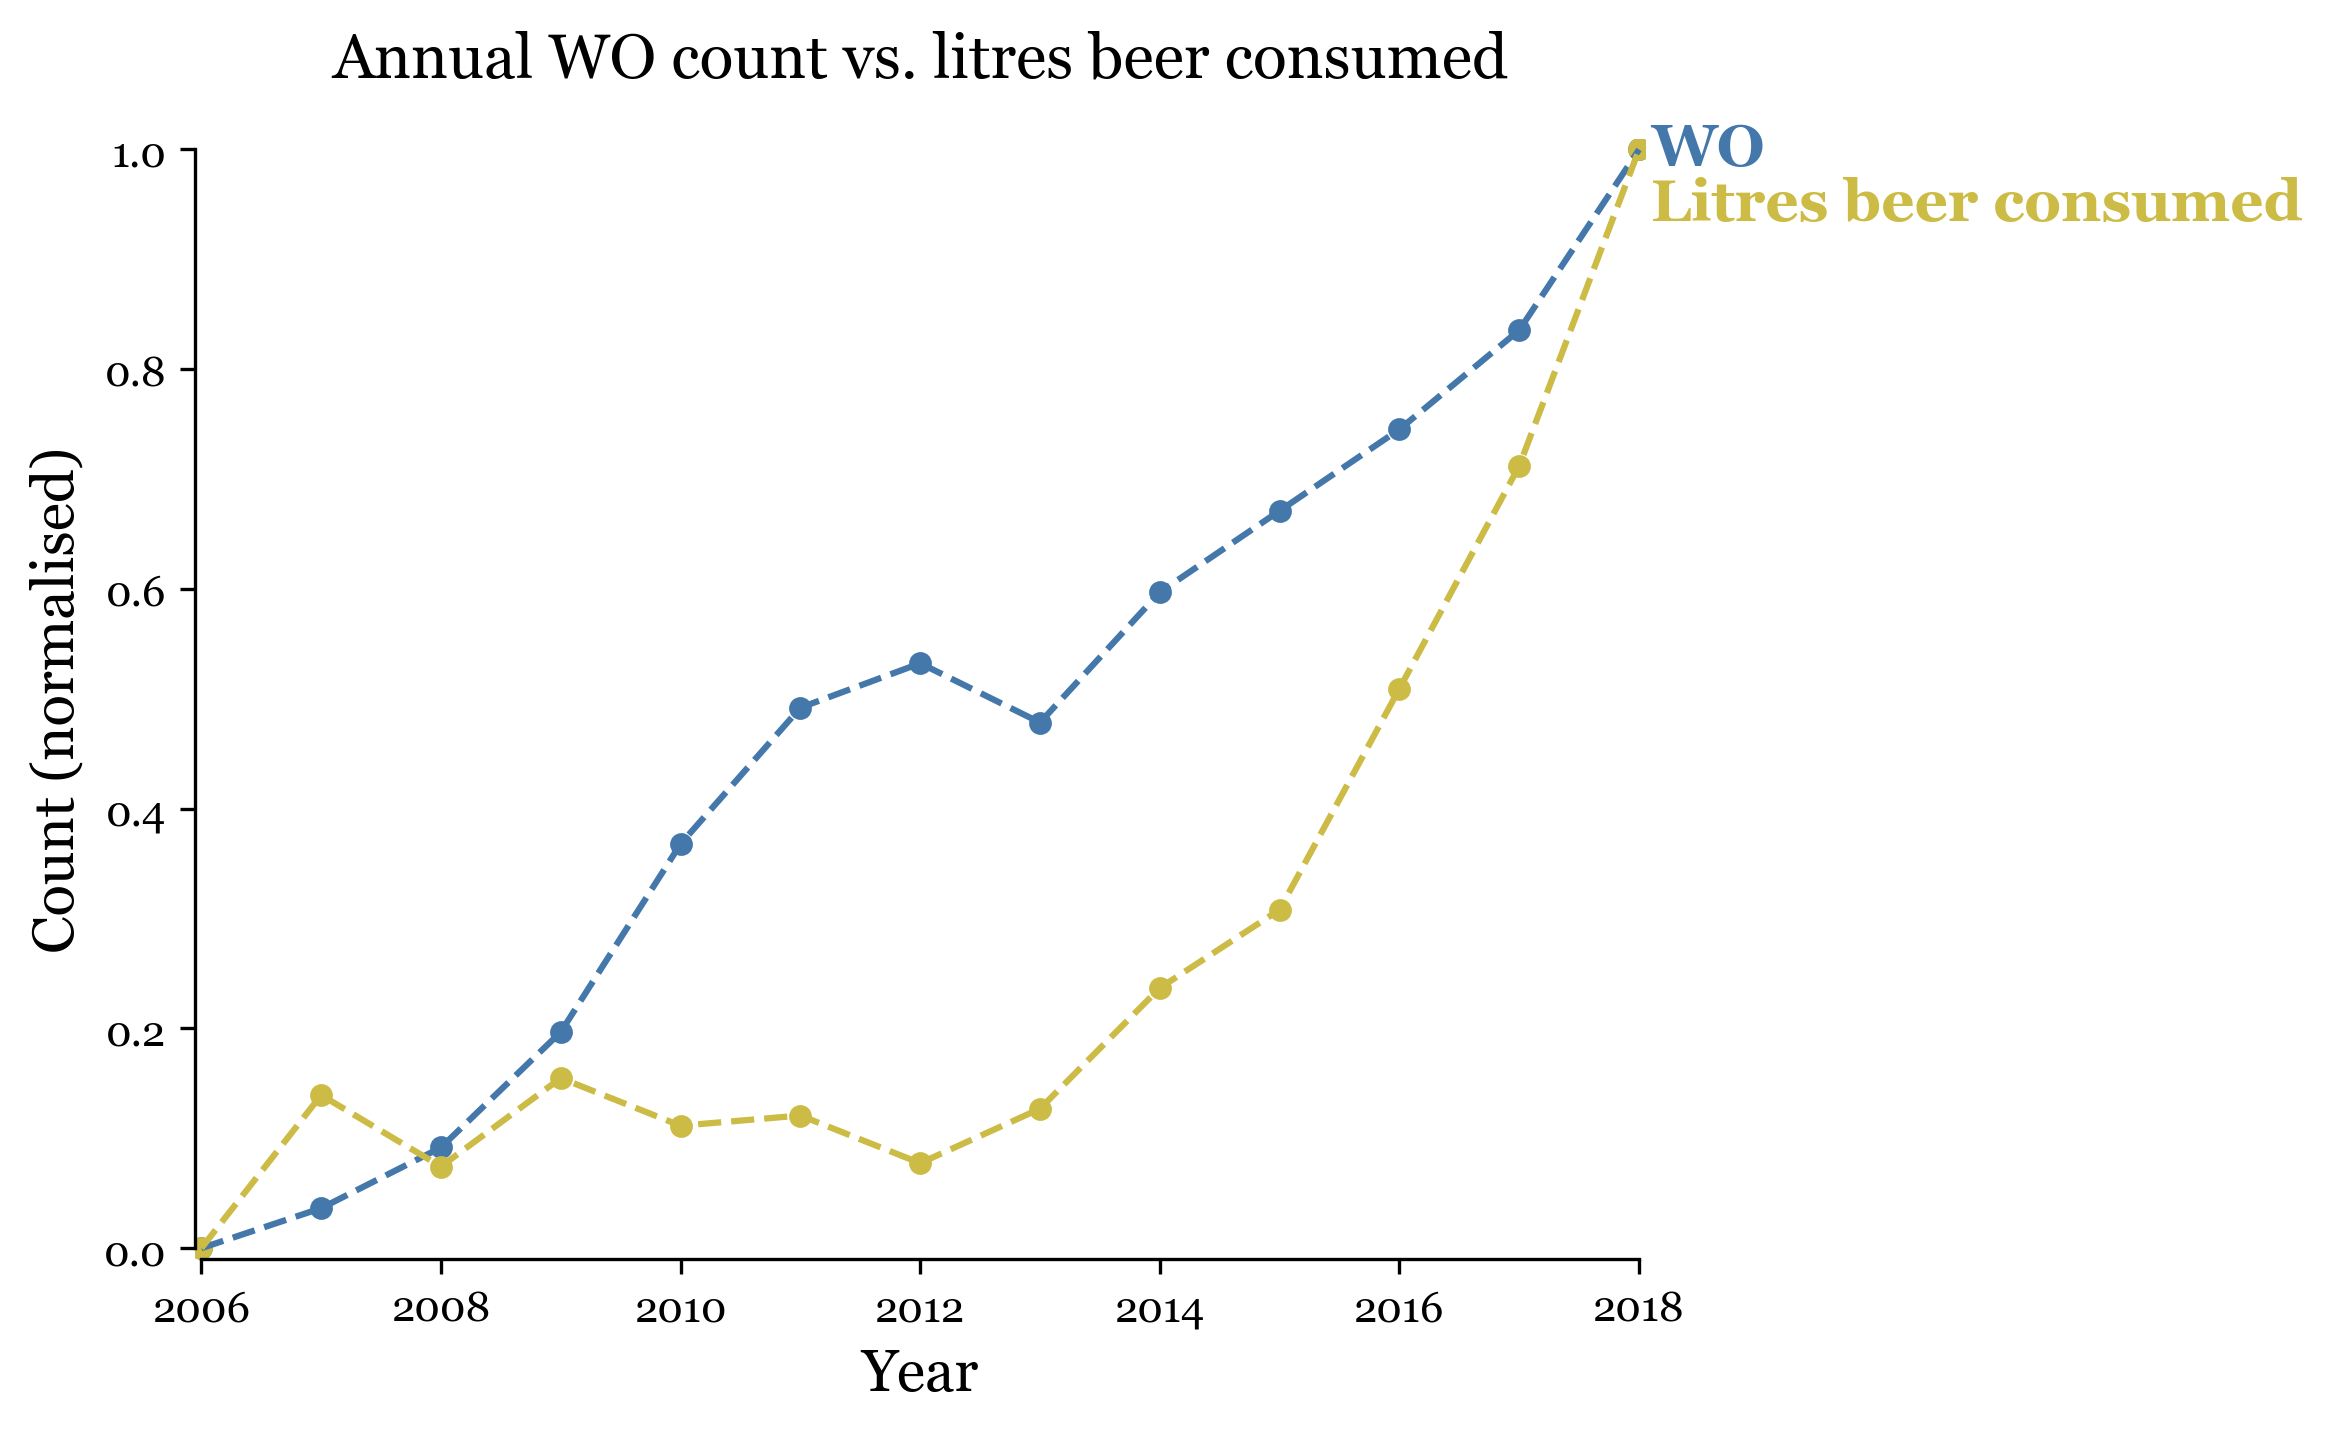

In [77]:
(fig, ax) = plt.subplots(figsize=(8,5))

year = data.select("Year").to_numpy()
wo_normalised = data.select("WO normalised").to_numpy()
beer_consumed_normalised = data.select("Litres beer consumed normalised").to_numpy()

ax.scatter(year, wo_normalised, color="#4477AA", s=20)
ax.plot(year, wo_normalised, color="#4477AA", linestyle="dashed", linewidth=1.5)
ax.text(
    year.max() + 0.1, 
    wo_normalised.max(), 
    "WO", 
    color="#4477AA", 
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)

ax.scatter(year, beer_consumed_normalised, color="#CCBB44", s=20)
ax.plot(year, beer_consumed_normalised, color="#CCBB44", linestyle="dashed", linewidth=1.5)
ax.text(
    year.max() + 0.1, 
    0.95, 
    "Litres beer consumed", 
    color="#CCBB44", 
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)

ax.set_ylim(-0.01, 1.01)
ax.set_xlim(year.min() - 0.05, year.max() + 0.05)


ax.set_xlabel("Year")
ax.set_ylabel("Count (normalised)")
ax.set_title("Annual WO count vs. litres beer consumed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_bounds(year.min(), year.max())
ax.spines["left"].set_bounds(0, 1)

fig.tight_layout()
fig.savefig("wo_vs_beer_consumed.png", bbox_inches="tight")
plt.show()